In [2]:
pip install xlrd


     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ------------ --------------------------- 30.7/96.5 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- - 92.2/96.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 927.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install XlsxWriter



  Obtaining dependency information for XlsxWriter from https://files.pythonhosted.org/packages/37/94/25d3ec8587974de7ebd790232aa3155abfe44ed23df7ccaa4645977a1cbe/XlsxWriter-3.1.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/153.0 kB ? eta -:--:--
   -------- ------------------------------- 30.7/153.0 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 112.6/153.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 153.0/153.0 kB 1.3 MB/s eta 0:00:00


In [8]:
import pandas as pd

# 2022 ve 2023 Excel dosyalarını oku
df_2022 = pd.read_excel('2022.xls')
df_2023 = pd.read_excel('2023.xls')

# Yeni bir 'Tarih' sütunu ekleyip değerlerini ayarla
df_2022['Tarih'] = '2022-ağustos'
df_2023['Tarih'] = '2023-ağustos'

# Değişiklikleri kaydetmek için 'xlsxwriter' motorunu kullanarak yeni dosyaları oluşturun
writer_2022 = pd.ExcelWriter('2022_with_tarih.xls', engine='xlsxwriter')
writer_2023 = pd.ExcelWriter('2023_with_tarih.xls', engine='xlsxwriter')

# Verileri yazın
df_2022.to_excel(writer_2022, index=False)
df_2023.to_excel(writer_2023, index=False)

# ExcelWriter nesnelerini kapatın
writer_2022.close()
writer_2023.close()


In [9]:
import pandas as pd

# İki Excel dosyasını oku
df_2022 = pd.read_excel('2022_with_tarih.xls')
df_2023 = pd.read_excel('2023_with_tarih.xls')

# İki veri çerçevesini birleştir
combined_df = pd.concat([df_2022, df_2023], ignore_index=True)

# Birleştirilmiş veriyi yeni bir Excel dosyasına kaydet
combined_df.to_excel('combined_excel.xlsx', index=False)


In [10]:
import pandas as pd

# Birleştirilmiş Excel dosyasını oku
combined_df = pd.read_excel('combined_excel.xlsx')

# 'Tarih' sütunundaki değerlerin sayısını hesapla
counts = combined_df['Tarih'].value_counts()

# Sonuçları yazdır
print(counts)


Tarih
2022-ağustos    199
2023-ağustos    181
Name: count, dtype: int64


In [11]:
import pandas as pd

# Birleştirilmiş Excel dosyasını oku
combined_df = pd.read_excel('combined_excel.xlsx')

# Eşleşen ve eşleşmeyen ürünleri bulmak için gruplama yapın
grouped = combined_df.groupby('Kodu')

matching_count = 0
non_matching_count = 0

for code, group in grouped:
    if len(group['Tarih'].unique()) == 2:
        matching_count += 1
    else:
        non_matching_count += 1

# Sonuçları yazdır
print(f"Eşleşen {matching_count} ürün var.")
print(f"Eşleşmeyen {non_matching_count} ürün var.")


Eşleşen 116 ürün var.
Eşleşmeyen 146 ürün var.


In [12]:
import pandas as pd

# Birleştirilmiş Excel dosyasını oku
combined_df = pd.read_excel('combined_excel.xlsx')

# Eşleşen ve eşleşmeyen ürünleri bulmak için gruplama yapın
grouped = combined_df.groupby('Açıklama')

matching_count = 0
non_matching_count = 0

for code, group in grouped:
    if len(group['Tarih'].unique()) == 2:
        matching_count += 1
    else:
        non_matching_count += 1

# Sonuçları yazdır
print(f"Eşleşen {matching_count} ürün var.")
print(f"Eşleşmeyen {non_matching_count} ürün var.")

Eşleşen 116 ürün var.
Eşleşmeyen 146 ürün var.


In [13]:
import pandas as pd

# Birleştirilmiş Excel dosyasını oku
combined_df = pd.read_excel('combined_excel.xlsx')

# Açıklama sütununda boş olan satırları seç
empty_description = combined_df['Açıklama'].isna()

# Boş olan satırların sayısını bul
empty_description_count = empty_description.sum()

# Sonucu yazdır
print(f"Açıklama sütunu boş olan satır sayısı: {empty_description_count}")


Açıklama sütunu boş olan satır sayısı: 2


In [14]:
import pandas as pd

# Birleştirilmiş Excel dosyasını oku
combined_df = pd.read_excel('combined_excel.xlsx')

# Açıklama sütununda boş olan satırları silmek için dropna() fonksiyonunu kullanın
combined_df = combined_df.dropna(subset=['Açıklama'])

# Güncellenmiş veriyi yeni bir Excel dosyasına kaydedebilirsiniz
combined_df.to_excel('combined_excel_without_empty_rows.xlsx', index=False)


In [15]:
# 'Tarih' sütunundaki değerlerin sayısını hesapla
counts = combined_df['Tarih'].value_counts()

# Sonuçları yazdır
print(counts)


Tarih
2022-ağustos    198
2023-ağustos    180
Name: count, dtype: int64


In [16]:
# Eşleşen ve eşleşmeyen ürünleri bulmak için gruplama yapın
grouped = combined_df.groupby('Kodu')

matching_count = 0
non_matching_count = 0

for code, group in grouped:
    if len(group['Tarih'].unique()) == 2:
        matching_count += 1
    else:
        non_matching_count += 1

# Sonuçları yazdır
print(f"Eşleşen {matching_count} ürün var.")
print(f"Eşleşmeyen {non_matching_count} ürün var.")

Eşleşen 116 ürün var.
Eşleşmeyen 146 ürün var.


In [18]:
import pandas as pd

# Birleştirilmiş Excel dosyasını oku
combined_df = pd.read_excel('combined_excel.xlsx')

# Eşleşen ürünleri ve eşleşmeyen ürünleri ayırın
matching_products = combined_df[combined_df.duplicated(subset=['Kodu'], keep=False)]
non_matching_products = combined_df[~combined_df.duplicated(subset=['Kodu'], keep=False)]

# Eşleşen ürünleri yeni bir Excel dosyasına kaydedin
matching_products.to_excel('matching_products.xlsx', index=False)

# Eşleşmeyen ürünleri yeni bir Excel dosyasına kaydedin
non_matching_products.to_excel('non_matching_products.xlsx', index=False)


In [21]:
import pandas as pd
import numpy as np

# Eşleşen ürünleri içeren Excel dosyasını oku
matching_products_df = pd.read_excel('matching_products.xlsx')

# Ürünleri gruplandırmak için bir işlev tanımlayın
def group_products(description):
    if pd.notna(description):  # Boş olmayan hücreleri kontrol et
        if 'süt' in description.lower() or 'yufka' in description.lower() or 'yumurta' in description.lower():
            return 'Grup 1: Süt, Yufka ve Yumurta'
        elif 'peynir' in description.lower() or 'kaymak' in description.lower() or 'yoğurt' in description.lower():
            return 'Grup 2: Peynir, Kaymak ve Yoğurt'
    return 'Diğer Grup'

# "Grup" adında yeni bir sütun oluşturun ve ürünleri gruplandırın
matching_products_df['Grup'] = matching_products_df['Açıklama'].apply(group_products)

# Gruplandırılmış veriyi yeni bir Excel dosyasına kaydedin
matching_products_df.to_excel('matching_products_grouped.xlsx', index=False)


In [22]:
import pandas as pd

# Gruplandırılmış ürünleri içeren Excel dosyasını oku
grouped_products_df = pd.read_excel('matching_products_grouped.xlsx')

# Her bir gruptaki ürün sayısını hesapla
group_counts = grouped_products_df['Grup'].value_counts()

# Sonuçları yazdır
print(group_counts)


Grup
Diğer Grup                          208
Grup 1: Süt, Yufka ve Yumurta        18
Grup 2: Peynir, Kaymak ve Yoğurt      8
Name: count, dtype: int64


In [24]:
import pandas as pd

# Eşleşen ürünleri içeren Excel dosyasını oku
grouped_products_df = pd.read_excel('matching_products_grouped.xlsx')

# Grup 2'deki ürünleri seç
group_2_products = grouped_products_df[grouped_products_df['Grup'] == 'Grup 2: Peynir, Kaymak ve Yoğurt']

# Sadece "Açıklama" ve "Miktar" sütunlarını yazdır
selected_columns = ['Açıklama', 'Miktar']
group_2_products[selected_columns].to_excel('group_2_products.xlsx', index=False)

# Grup 2'deki ürünleri yazdır
print(group_2_products[selected_columns])


                         Açıklama  Miktar
7                      EV YOĞURTU   91.00
18   ÇAMLICA DOĞAL YOĞURT 900 GR.   19.00
44            KAYMAK KÜÇÜKÇİFTLİK    6.68
79                   SÜZME YOĞURT    2.87
124                    EV YOĞURTU  130.00
140  ÇAMLICA DOĞAL YOĞURT 900 GR.   15.00
184           KAYMAK KÜÇÜKÇİFTLİK    3.43
196                  SÜZME YOĞURT    2.19


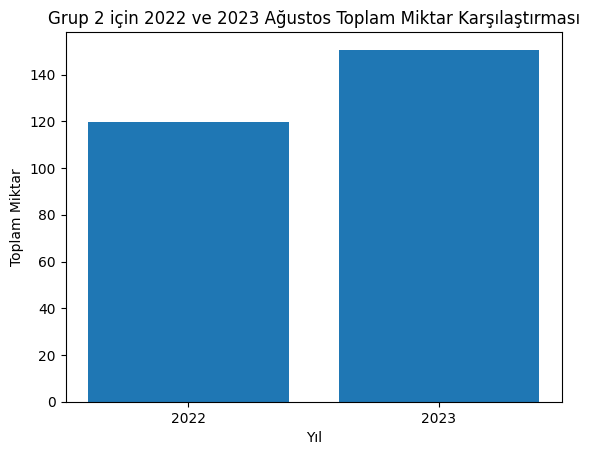

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Eşleşen ürünleri içeren Excel dosyasını oku
grouped_products_df = pd.read_excel('matching_products_grouped.xlsx')

def parse_date(date_str):
    # Tarih formatını dönüştür
    if date_str.endswith('-ağustos'):
        year = date_str.split('-')[0]
        return f"{year}-08"
    else:
        return date_str  # Formatı değiştirmeyin

# "Tarih" sütununu uygun formata dönüştür
grouped_products_df['Tarih'] = grouped_products_df['Tarih'].apply(parse_date)

# Grup 2'deki ürünleri seç
group_2_products = grouped_products_df[grouped_products_df['Grup'] == 'Grup 2: Peynir, Kaymak ve Yoğurt']

# 2022-ağustos ve 2023-ağustos tarihlerine sahip satırları seç
august_2022 = group_2_products[group_2_products['Tarih'] == '2022-08']
august_2023 = group_2_products[group_2_products['Tarih'] == '2023-08']

# 2022 ve 2023 yıllarındaki toplam miktarları hesapla
total_2022 = august_2022['Miktar'].sum()
total_2023 = august_2023['Miktar'].sum()

# Çubuk grafiği çizme
years = ['2022', '2023']
values = [total_2022, total_2023]

plt.bar(years, values)
plt.xlabel('Yıl')
plt.ylabel('Toplam Miktar')
plt.title('Grup 2 için 2022 ve 2023 Ağustos Toplam Miktar Karşılaştırması')
plt.show()


C:\Users\yucel\AppData\Local\Temp\ipykernel_20268\3872945379.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2_products['Tarih'] = pd.to_datetime(group_2_products['Tarih'])


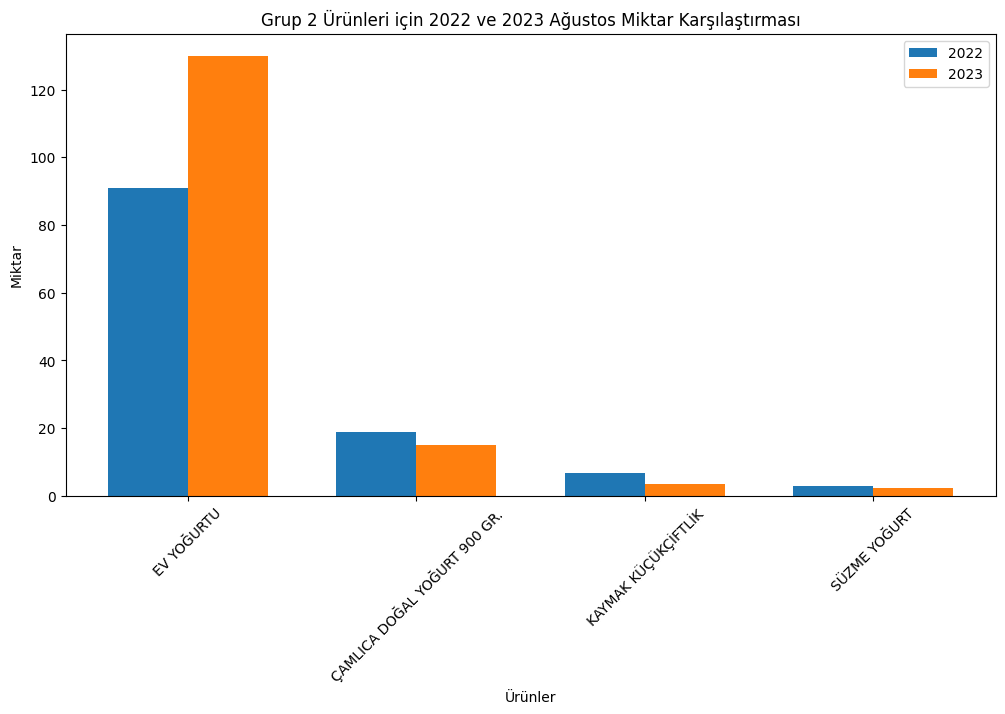

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Eşleşen ürünleri içeren Excel dosyasını oku
grouped_products_df = pd.read_excel('matching_products_grouped.xlsx')

# "Tarih" sütununu işlemek için özel bir fonksiyon tanımla
def parse_date(date_str):
    if date_str.endswith('-ağustos'):
        year = date_str.split('-')[0]
        return f"{year}-08"
    else:
        return date_str

# "Tarih" sütununu uygun formata dönüştür
grouped_products_df['Tarih'] = grouped_products_df['Tarih'].apply(parse_date)

# Grup 2'deki ürünleri seç
group_2_products = grouped_products_df[grouped_products_df['Grup'] == 'Grup 2: Peynir, Kaymak ve Yoğurt']

# 2022 ve 2023 yıllarındaki toplam miktarları hesapla
group_2_products['Tarih'] = pd.to_datetime(group_2_products['Tarih'])
august_2022 = group_2_products[group_2_products['Tarih'].dt.strftime('%Y-%B') == '2022-August']
august_2023 = group_2_products[group_2_products['Tarih'].dt.strftime('%Y-%B') == '2023-August']

# Ürünleri ve miktarları ayır
products = group_2_products['Açıklama'].unique()
values_2022 = [august_2022[august_2022['Açıklama'] == product]['Miktar'].sum() for product in products]
values_2023 = [august_2023[august_2023['Açıklama'] == product]['Miktar'].sum() for product in products]

# Çubuk grafiği çizme
x = range(len(products))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x, values_2022, width, label='2022')
bar2 = ax.bar([i + width for i in x], values_2023, width, label='2023')

ax.set_xlabel('Ürünler')
ax.set_ylabel('Miktar')
ax.set_title('Grup 2 Ürünleri için 2022 ve 2023 Ağustos Miktar Karşılaştırması')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(products, rotation=45)
ax.legend()

plt.show()


C:\Users\yucel\AppData\Local\Temp\ipykernel_20268\4264255062.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2_products['Tarih'] = pd.to_datetime(group_2_products['Tarih'])


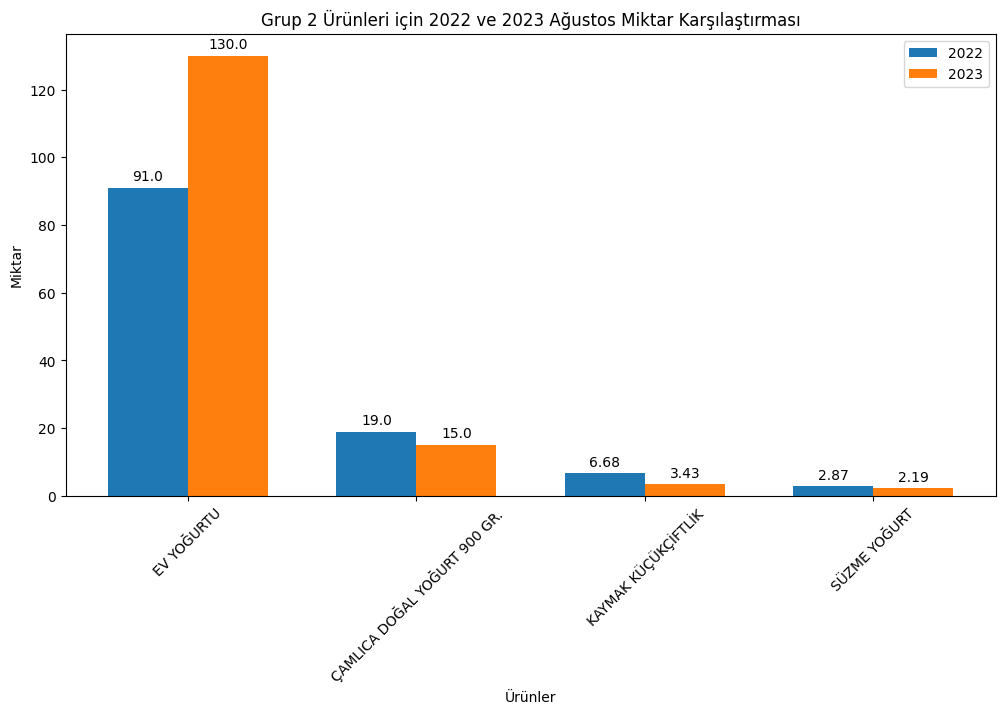

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Eşleşen ürünleri içeren Excel dosyasını oku
grouped_products_df = pd.read_excel('matching_products_grouped.xlsx')

# "Tarih" sütununu işlemek için özel bir fonksiyon tanımla
def parse_date(date_str):
    if date_str.endswith('-ağustos'):
        year = date_str.split('-')[0]
        return f"{year}-08"
    else:
        return date_str

# "Tarih" sütununu uygun formata dönüştür
grouped_products_df['Tarih'] = grouped_products_df['Tarih'].apply(parse_date)

# Grup 2'deki ürünleri seç
group_2_products = grouped_products_df[grouped_products_df['Grup'] == 'Grup 2: Peynir, Kaymak ve Yoğurt']

# 2022 ve 2023 yıllarındaki toplam miktarları hesapla
group_2_products['Tarih'] = pd.to_datetime(group_2_products['Tarih'])
august_2022 = group_2_products[group_2_products['Tarih'].dt.strftime('%Y-%B') == '2022-August']
august_2023 = group_2_products[group_2_products['Tarih'].dt.strftime('%Y-%B') == '2023-August']

# Ürünleri ve miktarları ayır
products = group_2_products['Açıklama'].unique()
values_2022 = [august_2022[august_2022['Açıklama'] == product]['Miktar'].sum() for product in products]
values_2023 = [august_2023[august_2023['Açıklama'] == product]['Miktar'].sum() for product in products]

# Çubuk grafiği çizme
x = range(len(products))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x, values_2022, width, label='2022')
bar2 = ax.bar([i + width for i in x], values_2023, width, label='2023')

ax.set_xlabel('Ürünler')
ax.set_ylabel('Miktar')
ax.set_title('Grup 2 Ürünleri için 2022 ve 2023 Ağustos Miktar Karşılaştırması')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(products, rotation=45)
ax.legend()

# Çubukların üzerine sayıları ekleme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()


In [42]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# Güncellenmiş DataFrame'i başka bir dosyaya kaydetmek isterseniz:
# df.to_excel('updated_matching_products.xlsx', index=False)

# Şimdi güncellenmiş "Tarih" sütununu içeren DataFrame'i kullanabilirsiniz.


In [44]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# İlk indeksteki ürünü seç
first_product = df.iloc[0]

# İlgili yılların miktarlarını al
august_2022_quantity = first_product['2022-ağustos']
august_2023_quantity = first_product['2023-ağustos']

# Miktarları kıyasla
if august_2023_quantity > august_2022_quantity:
    print(f"2023 yılında miktar, 2022 yılına göre artmıştır. Artış miktarı: {august_2023_quantity - august_2022_quantity}")
elif august_2023_quantity < august_2022_quantity:
    print(f"2023 yılında miktar, 2022 yılına göre azalmıştır. Azalış miktarı: {august_2022_quantity - august_2023_quantity}")
else:
    print("2022 ve 2023 yıllarında miktar değişikliği yoktur.")


KeyError: '2022-ağustos'

In [45]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# Başlıkları görüntüle
print(df.columns)


Index(['Kodu', 'Açıklama', 'Renk Adı', 'Beden', 'Miktar', 'Iskonto',
       'Net Tutar', 'Brüt Tutar', 'Maliyet', 'Maliyet Tutarı', 'Kar', 'Oran',
       'Fis', 'Sınıf', 'Tarih'],
      dtype='object')


In [46]:
df.head()

,Kodu,Açıklama,Renk Adı,Beden,Miktar,Iskonto,Net Tutar,Brüt Tutar,Maliyet,Maliyet Tutarı,Kar,Oran,Fis,Sınıf,Tarih
0,000039,EL AÇMASI YUFKA,NaN,,913.0,0.0,5479.5227,5480.0,9.0,8217.0,-2737.4773,-0.333148,216.0,NaN,2022-ağustos
1,8699856790030,GEZEN TAVUK YUMURTASI 15 Lİ,NaN,,221.0,0.0,8669.4084,8669.0,40.0,8840.0,-170.5916,-0.019298,186.0,NaN,2022-ağustos
2,000044,GÜNLÜK SÜT 5 LT,NaN,,195.0,0.0,12675.9816,12675.0,97.5,19012.5,-6336.5184,-0.333282,190.0,NaN,2022-ağustos
3,000050,KÖY YUMURTASI,NaN,,195.0,0.0,519.4908,519.5,2.9,565.5,-46.0092,-0.08136,30.0,NaN,2022-ağustos
4,000043,GÜNLÜK SÜT 3 LT,NaN,,193.0,0.0,8102.0000,8102.0,65.0,12545.0,-4443.0000,-0.354165,185.0,NaN,2022-ağustos


In [47]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# İlgili sütunları seç
miktar_2022 = df.loc[0]['Miktar']
miktar_2023 = df.loc[1]['Miktar']

# Miktarları kıyasla
if miktar_2023 > miktar_2022:
    print(f"2023 yılında miktar, 2022 yılına göre artmıştır. Artış miktarı: {miktar_2023 - miktar_2022}")
elif miktar_2023 < miktar_2022:
    print(f"2023 yılında miktar, 2022 yılına göre azalmıştır. Azalış miktarı: {miktar_2022 - miktar_2023}")
else:
    print("2022 ve 2023 yıllarında miktar değişikliği yoktur.")


2023 yılında miktar, 2022 yılına göre azalmıştır. Azalış miktarı: 692.0


In [48]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# İlgili sütunları seç
indeks_2022 = 0
indeks_2023 = 1

# 2022 ve 2023 yıllarındaki miktarları ve açıklamaları al
miktar_2022 = df.loc[indeks_2022]['Miktar']
miktar_2023 = df.loc[indeks_2023]['Miktar']
aciklama_2022 = df.loc[indeks_2022]['Açıklama']
aciklama_2023 = df.loc[indeks_2023]['Açıklama']

# Miktarları ve açıklamaları göster
print(f"2022 yılında {aciklama_2022} ürününün miktarı: {miktar_2022}")
print(f"2023 yılında {aciklama_2023} ürününün miktarı: {miktar_2023}")

# Miktarları kıyasla
if miktar_2023 > miktar_2022:
    print(f"2023 yılında miktar, 2022 yılına göre artmıştır. Artış miktarı: {miktar_2023 - miktar_2022}")
elif miktar_2023 < miktar_2022:
    print(f"2023 yılında miktar, 2022 yılına göre azalmıştır. Azalış miktarı: {miktar_2022 - miktar_2023}")
else:
    print("2022 ve 2023 yıllarında miktar değişikliği yoktur.")


2022 yılında EL AÇMASI YUFKA ürününün miktarı: 913.0
2023 yılında GEZEN TAVUK YUMURTASI 15 Lİ ürününün miktarı: 221.0
2023 yılında miktar, 2022 yılına göre azalmıştır. Azalış miktarı: 692.0


In [49]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# "Kodu" sütunu aynı olan ürünleri eşleşen olarak kabul edelim
eşleşen_ürünler = df[df.duplicated(subset='Kodu', keep=False)]

# Eşleşen ürünleri liste halinde yazdır
print(eşleşen_ürünler[['Kodu', 'Açıklama', 'Miktar', 'Tarih']])


                     Kodu                     Açıklama   Miktar Tarih
0    000039                            EL AÇMASI YUFKA  913.000  2022
1    8699856790030         GEZEN TAVUK YUMURTASI 15 Lİ  221.000  2022
2    000044                            GÜNLÜK SÜT 5 LT  195.000  2022
3    000050                              KÖY YUMURTASI  195.000  2022
4    000043                            GÜNLÜK SÜT 3 LT  193.000  2022
..                    ...                          ...      ...   ...
229  01127                                 İSLİ PEYNİR    0.455  2023
230  01082                            GÜN KURUSU PAKET    0.415  2023
231  01124                       DOĞAL AYDIN DAĞ İNCİR    0.160  2023
232  01172                                KABUK TARÇIN    0.095  2023
233                   NaN                          NaN      NaN  2023

[234 rows x 4 columns]


In [50]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# "Kodu" sütunu aynı olan ürünlerden sadece bir tanesini seç
tek_tane_urun = df.drop_duplicates(subset='Kodu')

# 2022-ağustos ve 2023-ağustos miktarlarını al
miktar_2022 = tek_tane_urun.loc[0]['Miktar']
miktar_2023 = tek_tane_urun.loc[1]['Miktar']

# Miktarları kıyasla
if miktar_2023 > miktar_2022:
    print(f"2023 yılında miktar, 2022 yılına göre artmıştır. Artış miktarı: {miktar_2023 - miktar_2022}")
elif miktar_2023 < miktar_2022:
    print(f"2023 yılında miktar, 2022 yılına göre azalmıştır. Azalış miktarı: {miktar_2022 - miktar_2023}")
else:
    print("2022 ve 2023 yıllarında miktar değişikliği yoktur.")


2023 yılında miktar, 2022 yılına göre azalmıştır. Azalış miktarı: 692.0


In [51]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# "Kodu" sütunu aynı olan ürünlerden sadece bir tanesini seç
tek_tane_urun = df.drop_duplicates(subset='Kodu')

# 2022-ağustos ve 2023-ağustos miktarlarını al
miktar_2022 = tek_tane_urun.loc[0]['Miktar']
miktar_2023 = tek_tane_urun.loc[1]['Miktar']

# Açıklamaları al
aciklama_2022 = tek_tane_urun.loc[0]['Açıklama']
aciklama_2023 = tek_tane_urun.loc[1]['Açıklama']

# Miktarları ve açıklamaları göster
print(f"Ürün Açıklama 2022 Miktar 2023 Miktar")
print(f"{aciklama_2022} {miktar_2022} {miktar_2023}")


Ürün Açıklama 2022 Miktar 2023 Miktar
EL AÇMASI YUFKA 913.0 221.0


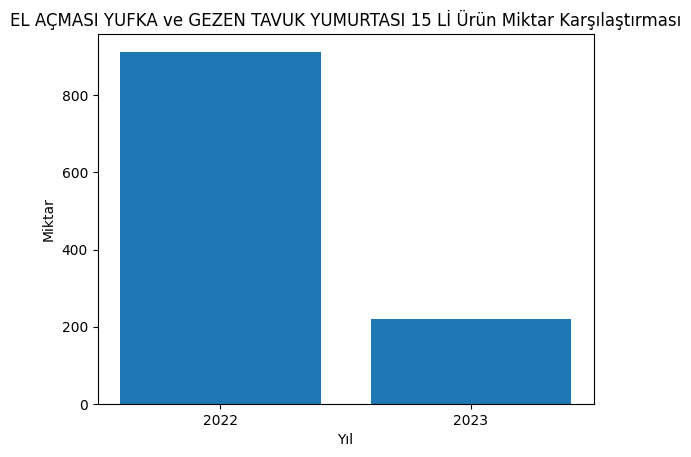

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# "Kodu" sütunu aynı olan ürünlerden sadece bir tanesini seç
tek_tane_urun = df.drop_duplicates(subset='Kodu')

# 2022-ağustos ve 2023-ağustos miktarlarını al
miktar_2022 = tek_tane_urun.loc[0]['Miktar']
miktar_2023 = tek_tane_urun.loc[1]['Miktar']

# Açıklamaları al
aciklama_2022 = tek_tane_urun.loc[0]['Açıklama']
aciklama_2023 = tek_tane_urun.loc[1]['Açıklama']

# Bar grafik oluştur
years = ['2022', '2023']
quantities = [miktar_2022, miktar_2023]

plt.bar(years, quantities)
plt.xlabel('Yıl')
plt.ylabel('Miktar')
plt.title(f'{aciklama_2022} ve {aciklama_2023} Ürün Miktar Karşılaştırması')
plt.show()


In [55]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# "Kodu" sütunu aynı olan ürünlerden sadece bir tanesini seç
tek_tane_urun = df.drop_duplicates(subset='Kodu')

# 2022-ağustos ve 2023-ağustos miktarlarını al
miktar_2022 = tek_tane_urun.loc[0]['Miktar']
miktar_2023 = tek_tane_urun.loc[1]['Miktar']

# Açıklamaları al
aciklama_2022 = tek_tane_urun.loc[0]['Açıklama']
aciklama_2023 = tek_tane_urun.loc[1]['Açıklama']

# Tabloyu yazdır
print(f"Kodu    Açıklama    2022    2023")
print(f"{tek_tane_urun['Kodu'].values[0]}    {aciklama_2022}    {miktar_2022}    {miktar_2023}")


Kodu    Açıklama    2022    2023
000039                  EL AÇMASI YUFKA    913.0    221.0


In [56]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# "Kodu" sütunu aynı olan ürünlerden sadece bir tanesini seç
tek_tane_urun = df.drop_duplicates(subset='Kodu')

# Eşleşen ürünleri yazdır
print(f"Kodu\tAçıklama\t2022\t2023")
for index, row in tek_tane_urun.iterrows():
    kod = row['Kodu']
    aciklama = row['Açıklama']
    miktar_2022 = df[(df['Kodu'] == kod) & (df['Tarih'] == '2022')]['Miktar'].values[0]
    miktar_2023 = df[(df['Kodu'] == kod) & (df['Tarih'] == '2023')]['Miktar'].values[0]
    print(f"{kod}\t{aciklama}\t{miktar_2022}\t{miktar_2023}")


Kodu	Açıklama	2022	2023
000039              	EL AÇMASI YUFKA	913.0	1141.0
8699856790030       	GEZEN TAVUK YUMURTASI 15 Lİ	221.0	337.0
000044              	GÜNLÜK SÜT 5 LT	195.0	268.0
000050              	KÖY YUMURTASI	195.0	177.0
000043              	GÜNLÜK SÜT 3 LT	193.0	289.0
01198               	SERT EZİNE PEYNİRİ	161.365	141.77
000038              	MANDA SÜTÜ	112.0	138.0
000085              	EV YOĞURTU	91.0	130.0
000040              	KÖY EKMEK	74.0	66.0
000114              	JERSEY SÜTÜ 3 LT.	64.0	118.0
01109               	MİHALİÇ LOR PEYNİRİ	45.96	57.125
01048               	HATAY TEREYAĞI	30.26	21.56
000042              	KEÇİ SÜTÜ	29.0	40.0
01147               	SUCUK ÖZATEŞ	21.24	22.645
01122               	EV MANTISI	21.21	10.775
01105               	AÇIK DOMATES SALÇASI 	20.345	27.805
01029               	TAZE BLOK KAŞAR PEYNİRİ ERGE	20.18	23.08
8684076787809       	T. YAĞLI MANDA YOĞURDU 750 GR	19.0	13.0
8697456950144       	ÇAMLICA DOĞAL YOĞURT 900 GR.	19.0	15.0
868133034905

IndexError: index 0 is out of bounds for axis 0 with size 0

In [57]:
import pandas as pd

# Eşleşen ürünleri oluştur
eşleşen_ürünler = []

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# "Kodu" sütunu aynı olan ürünlerden sadece bir tanesini seç
tek_tane_urun = df.drop_duplicates(subset='Kodu')

# Eşleşen ürünleri oluştur
for index, row in tek_tane_urun.iterrows():
    kod = row['Kodu']
    aciklama = row['Açıklama']
    miktar_2022 = df[(df['Kodu'] == kod) & (df['Tarih'] == '2022')]['Miktar'].values[0]
    miktar_2023 = df[(df['Kodu'] == kod) & (df['Tarih'] == '2023')]['Miktar'].values[0]
    eşleşen_ürünler.append([kod, aciklama, miktar_2022, miktar_2023])

# Eşleşen ürünleri bir DataFrame'e dönüştür
eşleşen_ürünler_df = pd.DataFrame(eşleşen_ürünler, columns=['Kodu', 'Açıklama', '2022', '2023'])

# Yeni Excel dosyasına kaydet
eşleşen_ürünler_df.to_excel('eşleşen_ürünler.xlsx', index=False)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [58]:
import pandas as pd

# Eşleşen ürünleri oluştur
eşleşen_ürünler = []

# Excel dosyasını oku
df = pd.read_excel('matching_products.xlsx')

# "Tarih" sütunundaki verileri güncelle
df['Tarih'] = df['Tarih'].str.replace('2022-ağustos', '2022').str.replace('2023-ağustos', '2023')

# "Kodu" sütunu aynı olan ürünlerden sadece bir tanesini seç
tek_tane_urun = df.drop_duplicates(subset='Kodu')

# Eşleşen ürünleri oluştur
for index, row in tek_tane_urun.iterrows():
    kod = row['Kodu']
    aciklama = row['Açıklama']
    miktar_2022 = df[(df['Kodu'] == kod) & (df['Tarih'] == '2022')]['Miktar'].values
    miktar_2023 = df[(df['Kodu'] == kod) & (df['Tarih'] == '2023')]['Miktar'].values

    # Eğer belirli bir kombinasyonda veri yoksa, varsayılan olarak 0 olarak kabul et
    miktar_2022 = miktar_2022[0] if len(miktar_2022) > 0 else 0
    miktar_2023 = miktar_2023[0] if len(miktar_2023) > 0 else 0

    eşleşen_ürünler.append([kod, aciklama, miktar_2022, miktar_2023])

# Eşleşen ürünleri bir DataFrame'e dönüştür
eşleşen_ürünler_df = pd.DataFrame(eşleşen_ürünler, columns=['Kodu', 'Açıklama', '2022', '2023'])

# Yeni Excel dosyasına kaydet
eşleşen_ürünler_df.to_excel('eşleşen_ürünler.xlsx', index=False)


In [60]:
df = pd.read_excel('eşleşen_ürünler.xlsx')
df.head()

,Kodu,Açıklama,2022,2023
0,000039,EL AÇMASI YUFKA,913.0,1141.0
1,8699856790030,GEZEN TAVUK YUMURTASI 15 Lİ,221.0,337.0
2,000044,GÜNLÜK SÜT 5 LT,195.0,268.0
3,000050,KÖY YUMURTASI,195.0,177.0
4,000043,GÜNLÜK SÜT 3 LT,193.0,289.0


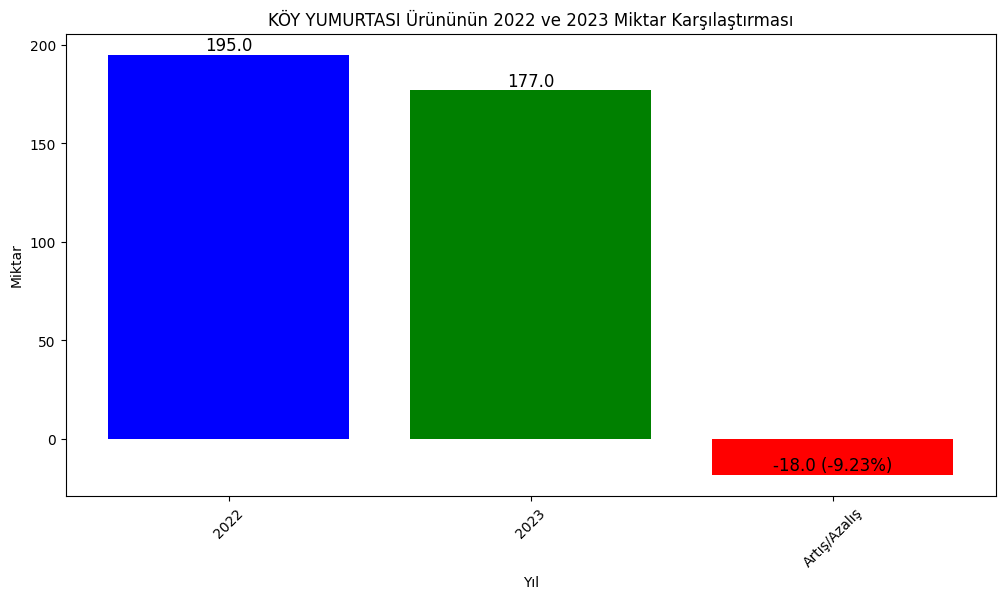

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
eşleşen_df = pd.read_excel('eşleşen_ürünler.xlsx')

# İlk indexteki ürünü seç
ilk_urun = eşleşen_df.iloc[3]

# İlgili yılların miktarlarını ve açıklamayı al
miktar_2022 = ilk_urun['2022']
miktar_2023 = ilk_urun['2023']
aciklama = ilk_urun['Açıklama']

# Artış veya azalışı hesapla
artis_azalis = miktar_2023 - miktar_2022
renk = 'green' if artis_azalis > 0 else 'red'

# Verileri bir çubuk grafikte göster
plt.figure(figsize=(12, 6))
plt.bar(['2022', '2023'], [miktar_2022, miktar_2023], color=['blue', 'green'])
plt.text('2022', miktar_2022, str(miktar_2022), ha='center', va='bottom', fontsize=12)
plt.text('2023', miktar_2023, str(miktar_2023), ha='center', va='bottom', fontsize=12)
plt.xlabel('Yıl')
plt.ylabel('Miktar')
plt.title(f'{aciklama} Ürününün 2022 ve 2023 Miktar Karşılaştırması')
plt.bar('Artış/Azalış', artis_azalis, color=renk)
plt.text('Artış/Azalış', artis_azalis, f'{artis_azalis} ({artis_azalis/miktar_2022:.2%})', ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=45)
plt.show()


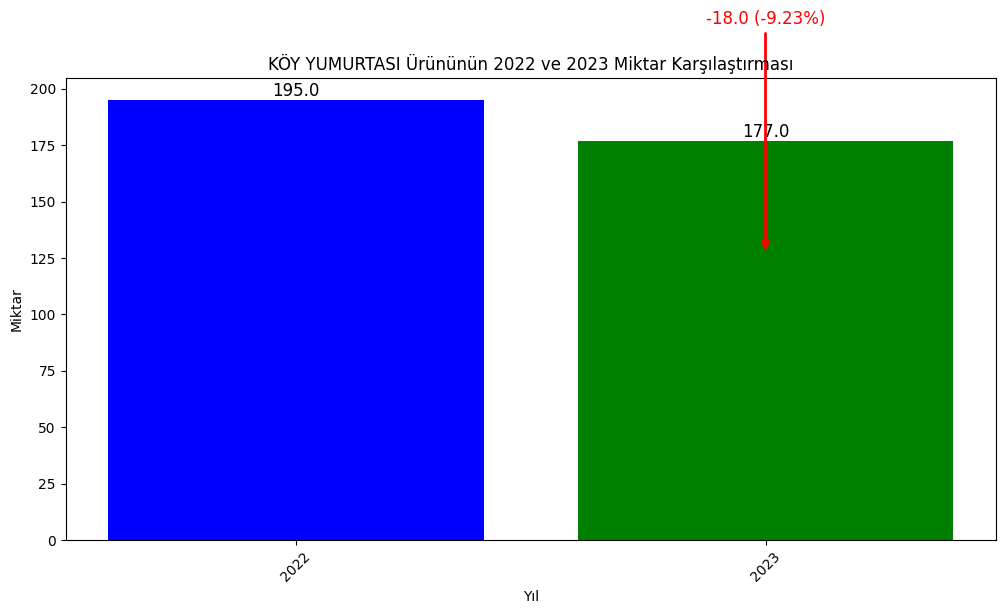

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
eşleşen_df = pd.read_excel('eşleşen_ürünler.xlsx')

# İlk indexteki ürünü seç
ilk_urun = eşleşen_df.iloc[3]

# İlgili yılların miktarlarını ve açıklamayı al
miktar_2022 = ilk_urun['2022']
miktar_2023 = ilk_urun['2023']
aciklama = ilk_urun['Açıklama']

# Artış veya azalışı hesapla
artis_azalis = miktar_2023 - miktar_2022
renk = 'green' if artis_azalis > 0 else 'red'

# Verileri bir çubuk grafikte göster
plt.figure(figsize=(12, 6))
plt.bar(['2022', '2023'], [miktar_2022, miktar_2023], color=['blue', 'green'])
plt.text('2022', miktar_2022, str(miktar_2022), ha='center', va='bottom', fontsize=12)
plt.text('2023', miktar_2023, str(miktar_2023), ha='center', va='bottom', fontsize=12)
plt.xlabel('Yıl')
plt.ylabel('Miktar')
plt.title(f'{aciklama} Ürününün 2022 ve 2023 Miktar Karşılaştırması')

# Artış/Azalış barını ok şeklinde çiz
arrow_color = 'green' if artis_azalis > 0 else 'red'
arrow_text = f'{artis_azalis} ({artis_azalis/miktar_2022:.2%})'
arrow_x = 1
arrow_y = max(miktar_2022, miktar_2023) + 50 if artis_azalis > 0 else min(miktar_2022, miktar_2023) - 50
arrow = plt.annotate(arrow_text, (arrow_x, arrow_y), xytext=(arrow_x, arrow_y + 100),
                     arrowprops=dict(arrowstyle='->', color=arrow_color, lw=2),
                     fontsize=12, ha='center', va='bottom', color=arrow_color)

plt.xticks(rotation=45)
plt.show()
